In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json

data = None
with open('../data/diamond.json', 'r') as f:
    data = json.load(f)

basis = []
nkpt = []
kecut = []
for d in data:
    basis.append(data[d].get('basis', ''))
    nkpt.append(int(data[d].get('nkpt', 0)))
    ke_cutoff = data[d].get('ke_cutoff', 0)
    if ke_cutoff != 'None':
        kecut.append(float(ke_cutoff))

basis = list(set(basis))
nkpt = list(set(nkpt))
kecut = list(set(kecut))

nkpt.sort()
kecut.sort()

color = {'krhf': 'r', 'dmet': 'b'}

print(basis)

['gth-dzvp', 'gth-szv']


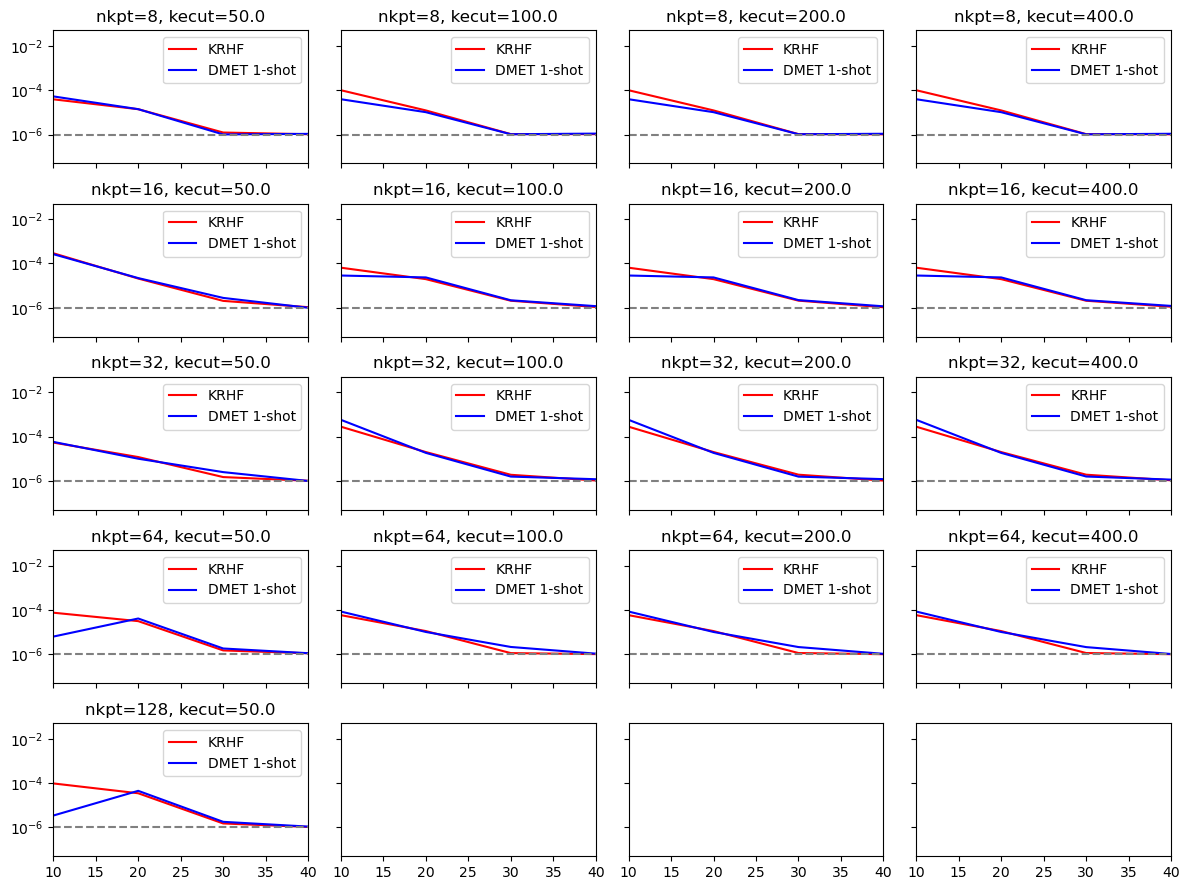

In [3]:


nkpt = nkpt[:5] # [:3]
kecut = kecut # [:4]

b = basis[0]
fig, ax = plt.subplots(len(nkpt), len(kecut), figsize=(12, 9), sharex=True, sharey=True)

for i, n in enumerate(nkpt):
    for j, k in enumerate(kecut):
        # search for x axis
        y1 = {"krhf": {}, "dmet": {}}
        y0 = {}
        yy = {}
        for d in data:
            ke_cutoff = data[d].get('ke_cutoff', 0)
            if ke_cutoff == 'None':
                continue

            is_matched = ke_cutoff == k and data[d].get('basis') == b and int(data[d].get('nkpt')) == n
            if is_matched:
                method = data[d].get('method', '')
                if method == 'fftdf':
                    y0["krhf"] = data[d].get('ene_krhf')
                    y0["dmet"] = data[d].get('ene_dmet')
                elif method == 'fftisdf':
                    yy["krhf"] = data[d].get('ene_krhf')
                    yy["dmet"] = data[d].get('ene_dmet')
                elif 'fftisdf' in method and len(method.split('-')) == 2:
                    c = method.split('-')[1]
                    c = int(c)
                    y1["krhf"][c] = data[d].get('ene_krhf')
                    y1["dmet"][c] = data[d].get('ene_dmet')

        if len(y0) == 0:
            continue

        for key in y0.keys():
            x = y1[key].keys()
            x = list(x)
            x.sort()
            y1[key] = np.array([y1[key][c] for c in x])
            y0[key] = y0[key]

            y = abs(y1[key] - y0[key]) + 1e-6
            label = key.upper() if key == 'krhf' else "DMET 1-shot"
            ax[i, j].semilogy(x, y, label=label, color=color[key], linestyle='-')

            if key in yy:
                y = [abs(yy[key] - y0[key]) + 1e-6] * len(x)
                ax[i, j].semilogy(x, y, color=color[key], linestyle='--')
        ax[i, j].set_title(f'nkpt={n}, kecut={k}')
        ax[i, j].set_xlim(10, 40)
        ax[i, j].set_ylim(5e-8, 5e-2)
        ax[i, j].axhline(y=1e-6, color='gray', linestyle='--')
        ax[i, j].legend()

fig.tight_layout()
plt.show()


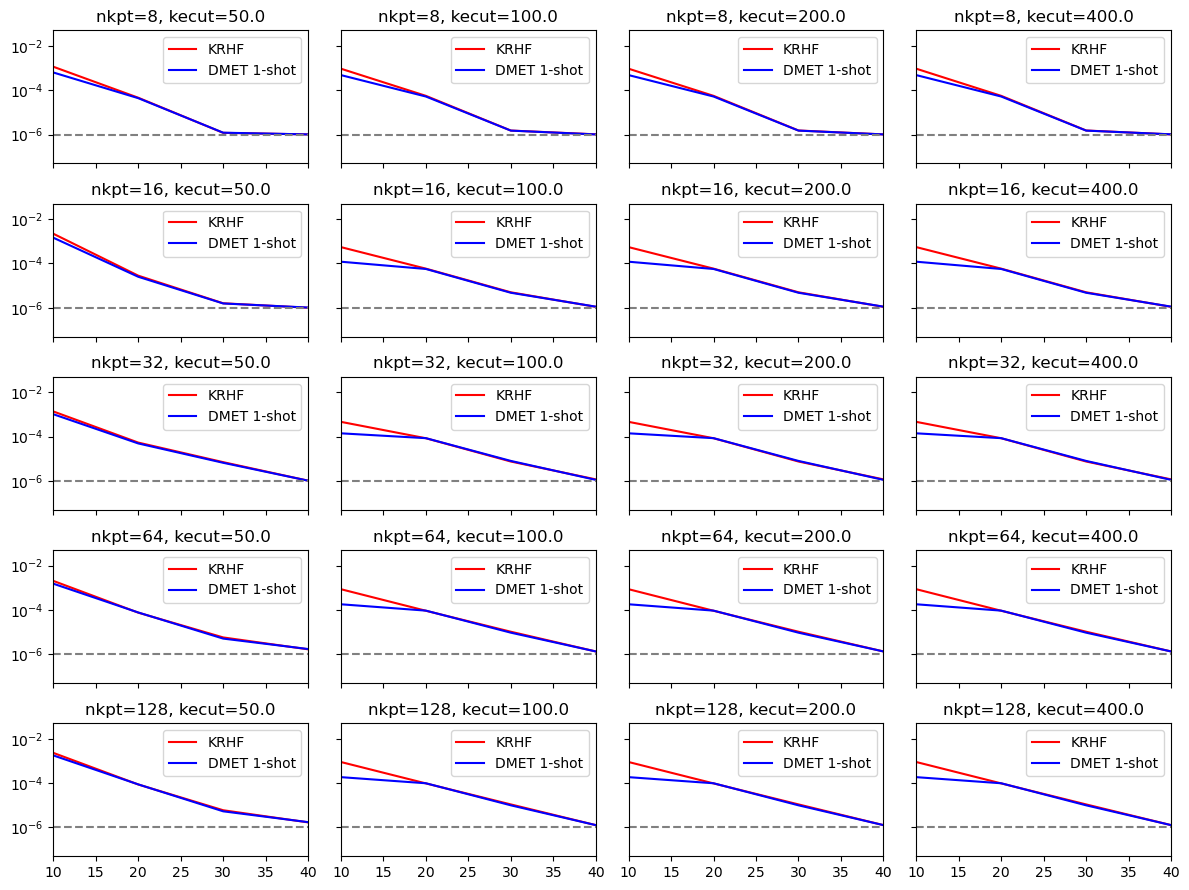

In [4]:
b = basis[1]
fig, ax = plt.subplots(len(nkpt), len(kecut), figsize=(12, 9), sharex=True, sharey=True)

for i, n in enumerate(nkpt):
    for j, k in enumerate(kecut):
        # search for x axis
        y1 = {"krhf": {}, "dmet": {}}
        y0 = {}
        yy = {}
        for d in data:
            ke_cutoff = data[d].get('ke_cutoff', 0)
            if ke_cutoff == 'None':
                continue

            is_matched = ke_cutoff == k and data[d].get('basis') == b and int(data[d].get('nkpt')) == n
            if is_matched:
                method = data[d].get('method', '')
                if method == 'fftdf':
                    y0["krhf"] = data[d].get('ene_krhf')
                    y0["dmet"] = data[d].get('ene_dmet')
                elif method == 'fftisdf':
                    yy["krhf"] = data[d].get('ene_krhf')
                    yy["dmet"] = data[d].get('ene_dmet')
                elif 'fftisdf' in method and len(method.split('-')) == 2:
                    c = method.split('-')[1]
                    c = int(c)
                    y1["krhf"][c] = data[d].get('ene_krhf')
                    y1["dmet"][c] = data[d].get('ene_dmet')

        if len(y0) == 0:
            continue

        for key in y0.keys():
            x = y1[key].keys()
            x = list(x)
            x.sort()
            y1[key] = np.array([y1[key][c] for c in x])
            y0[key] = y0[key]

            y = abs(y1[key] - y0[key]) + 1e-6
            label = key.upper() if key == 'krhf' else "DMET 1-shot"
            ax[i, j].semilogy(x, y, label=label, color=color[key], linestyle='-')

            if key in yy:
                y = [abs(yy[key] - y0[key]) + 1e-6] * len(x)
                ax[i, j].semilogy(x, y, color=color[key], linestyle='--')
        ax[i, j].set_title(f'nkpt={n}, kecut={k}')
        ax[i, j].set_xlim(10, 40)
        ax[i, j].set_ylim(5e-8, 5e-2)
        ax[i, j].axhline(y=1e-6, color='gray', linestyle='--')
        ax[i, j].legend()

fig.tight_layout()
plt.show()
